In [9]:
import pandas as pd
import numpy as np
import re
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
%matplotlib inline

In [2]:
df = pd.read_pickle('ted.pkl')

In [3]:
df.head()

,Content,Title
0,"You've heard of your I.Q., your general intell...",10_myths_about_psychology_debunked_Ben_Ambridg...
1,Alright. I'm going to show you a couple of ima...,10_things_you_didn't_know_about_orgasm_Mary_Ro...
2,Translator: Joseph Geni Reviewer: Morton Bast ...,10_top_time_saving_tech_tips_David_Pogue.md
3,"All right, I want to see a show of hands: how ...",10_ways_to_have_a_better_conversation_Celeste_...
4,It is a thrill to be here at a conference that...,12_sustainable_design_ideas_from_nature_Janine...


In [10]:
stop = set(stopwords.words('english'))

def clean_doc(doc):
    doc = re.sub('[^A-Za-z .-]+', ' ', doc)
    doc = ' '.join(doc.split())
    doc = ' '.join([i for i in doc.split() if i not in stop])
    return doc

In [14]:
cleaned = []
for i in range(len(df.Content)):
    text = df.Content.iloc[i]
    text = clean_doc(text)
    
    cleaned.append(text)

In [16]:
tfidf = TfidfVectorizer()

In [17]:
X = tfidf.fit_transform(cleaned)

In [18]:
X.shape

(2498, 57100)

In [23]:
svd = TruncatedSVD()

In [24]:
X_svd = svd.fit_transform(X)

In [25]:
X_svd.shape

(2498, 2)

In [26]:
X_svd

array([[ 0.30173403,  0.03787845],
       [ 0.26791532,  0.02000105],
       [ 0.22406323, -0.05907143],
       ..., 
       [ 0.47226655, -0.04018526],
       [ 0.12016263,  0.01455373],
       [ 0.1101356 ,  0.02994053]])

(-1, 1)

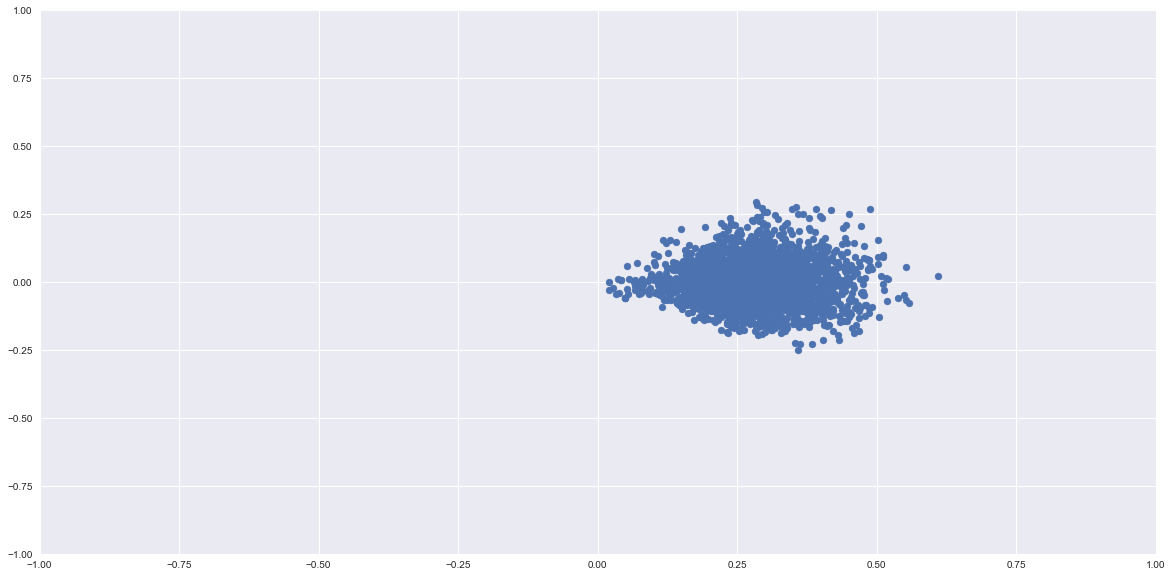

In [28]:
plt.figure(figsize=(20,10))
plt.scatter(X_svd[:, 0], X_svd[:, 1])

# words = list(model.wv.vocab)

# for i, word in enumerate(words):
# 	plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.xlim(-1,1)
plt.ylim(-1,1)

In [29]:
from mpl_toolkits import mplot3d

In [30]:
svd = TruncatedSVD(n_components=3)
X_svd = svd.fit_transform(X)

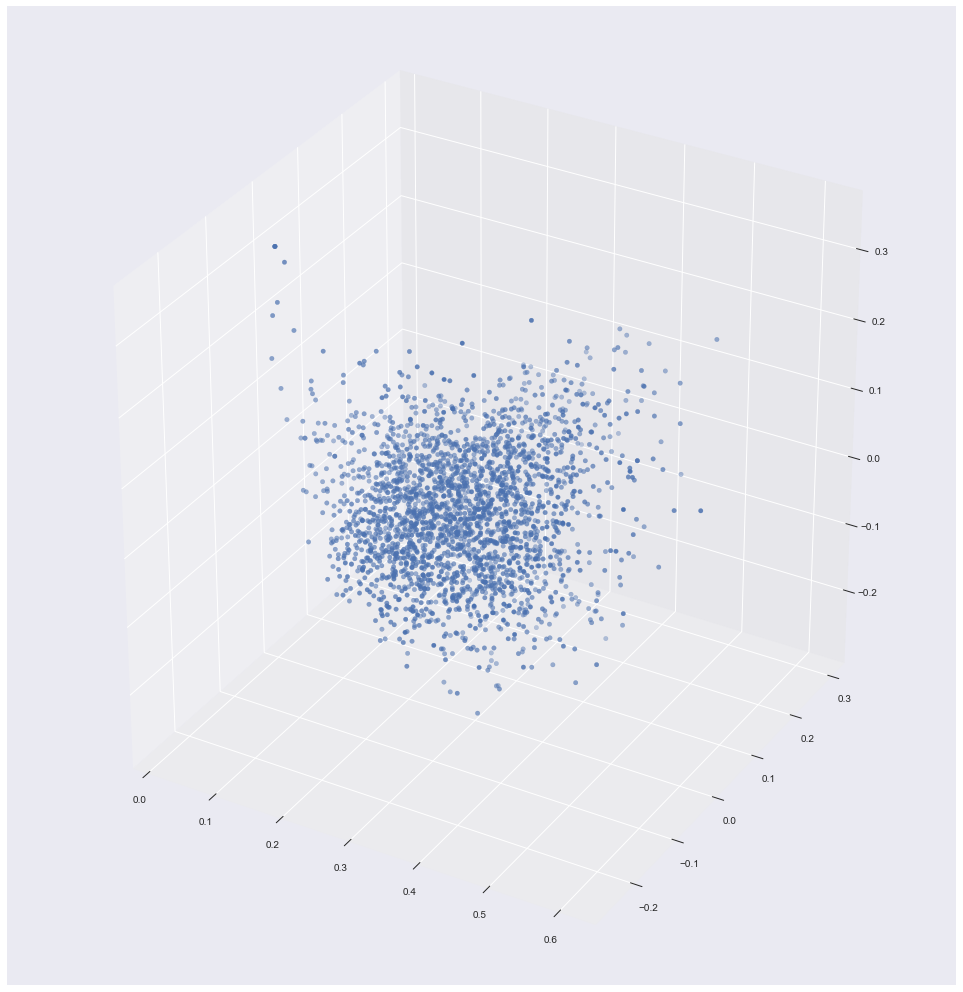

In [36]:
plt.figure(figsize=(17,18))
ax = plt.axes(projection='3d')
ax.scatter3D(X_svd[:, 0], X_svd[:, 1], X_svd[:,2])

In [37]:
#Try to get some annotations going

In [45]:
#tried and tested - it's a BAD IDEA